Treinando o modelo inicial

In [1]:
"""
Random Forest
Global Feature Selection 
    - X = 'Depth (m)', 'σ,v (kPa)', 'σ',v (kPa)', 'SBT (-)', 'SBTn (-)',
    'Mod. SBTn (-)', 'Oberhollenzer_classes', 'iso_classes_encoded'.

    
    - Y = 'qc (MPa)','fs (kPa)'.

Link: https://github.com/DowellChan/ResNetRegression
"""
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
import time

'''
PreProcessing
''' 
#Loading Database
df_cpt=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Target_Encoded_Database.csv')

#Transforming to DataFrame
df_cpt = pd.DataFrame(df_cpt)
df_cpt = df_cpt.drop(columns='Unnamed: 0')

#Dropping zeros from qc
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] < 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBT (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBTn (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['Mod. SBTn (-)']] == 0).any(axis = 1)]

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

'''
Inputs
'''
X = df_cpt[:, [1, 11, 17, 18, 19]]

#1 --> 'Depth (m)' --> index: 1
#2 --> 'σ,v (kPa)' --> index: 9
#3 --> "σ',v (kPa)" --> index: 11
#4 --> 'SBT (-)' --> index: 17
#5 --> 'SBTn (-)' --> index: 18
#6 --> 'Mod. SBTn (-)' --> index: 19 
#7 --> 'Ic (-)' --> index: 21
#8 --> 'Ic SBT (-)' --> index:22 
#9 --> 'Ib (-)' --> index: 23
#10 --> 'Oberhollenzer_classes' --> index: 24
#11 --> 'iso_classes_encoded' --> index: 27

#X=X.to(device) #To GPU

'''
Outputs
'''
y = df_cpt[:, [2, 3]] 

#1 --> 'qc (MPa)' --> index: 2
#2 --> 'fs (kPa)' --> index: 3

#y=y.to(device) #To GPU

#Scaling the and preparing the data
#scalerX = MinMaxScaler()
#scalerY = MinMaxScaler()

#Scaling the Data
#scaledX=scalerX.fit_transform(X)
#scaledY=scalerY.fit_transform(y)

#Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.20)

In [3]:
from sklearn.ensemble import RandomForestRegressor
#Random forest Model
model = RandomForestRegressor(n_estimators = 400, max_depth = 300,
                              min_samples_split = 15, min_samples_leaf = 2)


#Initial time
start_time = time.time()

#Fitting the model
model.fit(X_train, y_train)

#Final time
end_time = (time.time() - start_time)
print('The running time is: %.2f minutes' %(end_time/60))

The running time is: 15.72 minutes


# Teste outside

In [ ]:
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
import time
import joblib

________________________________________________________________________________
From Kurup and the model, based on the following variables:

'Depth (m)', "σ',v (kPa)", 'SBT (-)', 'SBTn (-)' & 'Mod. SBTn (-)'

________________________________________________________________________________

________________________________________________________________________________
Load Model
________________________________________________________________________________

In [ ]:
#Load model_06
model = model

________________________________________________________________________________
Predictions for YL_C2
________________________________________________________________________________

In [14]:
#Load Sample
df_cpt = pd.read_csv(r'/content/drive/MyDrive/Thesis/Article_03_CPT/df_YL_C2.csv')

#Dropping extra coumns
df_cpt = df_cpt.drop(['Unnamed: 0'], axis = 1)
df_cpt = df_cpt.drop([0, 1, 8, 9, 10], axis = 0)

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

In [ ]:
df_cpt

In [15]:
'''
Inputs
'''
X = df_cpt[:, [0, 1, 2, 3, 4]]

#1 --> 'Depth (m)' --> index: 0
#2 --> "σ',v (kPa)" --> index: 1
#3 --> 'SBT (-)' --> index: 2
#4 --> 'SBTn (-)' --> index: 3
#5 --> 'Mod. SBTn (-)' --> index: 4

'''
Outputs
'''
y = df_cpt[:, [5, 6]] 

#1 --> 'qc (MPa)' --> index: 5
#2 --> 'fs (kPa)' --> index: 6

In [16]:
#Making a prediction
y_pred_YL_C2 = model.predict(X)

In [ ]:
y_pred_YL_C2

array([[ 1.5370067 , 34.55433338],
       [ 1.90664224, 50.05980239],
       [ 1.23602632, 20.85912687],
       [ 0.71396692, 17.69440054],
       [ 0.87756638, 35.0791143 ],
       [ 0.64968918, 18.48781678]])

In [ ]:
y
#1, 8, 9, 10

In [17]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y, y_pred_YL_C2)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y, y_pred_YL_C2)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y, y_pred_YL_C2)
print('The R2 is: %.4f' %r2)

print('____________________________________________')

#Metrics for the qc
print('Metrics for qc')
mae_qc_YL_C2 = mean_absolute_error(y[:, 0], y_pred_YL_C2[:, 0])
print('The mae is: %.4f MPa' %mae_qc_YL_C2)
mse_qc_YL_C2 = mean_squared_error(y[:, 0], y_pred_YL_C2[:, 0])
print('The mse is: %.4f MPa' %mse_qc_YL_C2)
rmse_qc_YL_C2 = np.sqrt(mse_qc_YL_C2).mean()
print('The rmse is: %.4f MPa' %rmse_qc_YL_C2)
r2_qc_YL_C2 = r2_score(y[:, 0], y_pred_YL_C2[:, 0])
print('The R2 is: %.4f MPa' %r2_qc_YL_C2)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs_YL_C2 = mean_absolute_error(y[:, 1], y_pred_YL_C2[:, 1])
print('The mae is: %.4f kPa' %mae_fs_YL_C2)
mse_fs_YL_C2 = mean_squared_error(y[:, 1], y_pred_YL_C2[:, 1])
print('The mse is: %.4f kPa' %mse_fs_YL_C2)
rmse_fs_YL_C2 = np.sqrt(mse_fs_YL_C2).mean()
print('The rmse is: %.4f kPa' %rmse_fs_YL_C2)
r2_fs_YL_C2 = r2_score(y[:, 1], y_pred_YL_C2[:, 1])
print('The R2 is: %.4f MPa' %r2_fs_YL_C2)

Metrics Global
The mae is: 6.1888
The mse is: 87.9558
The rmse is: 9.3785
The R2 is: 0.4084
____________________________________________
Metrics for qc
The mae is: 0.1454 MPa
The mse is: 0.0324 MPa
The rmse is: 0.1800 MPa
The R2 is: 0.6776 MPa
____________________________________________
Metrics for fs
The mae is: 12.2321 kPa
The mse is: 175.8793 kPa
The rmse is: 13.2619 kPa
The R2 is: 0.1393 MPa


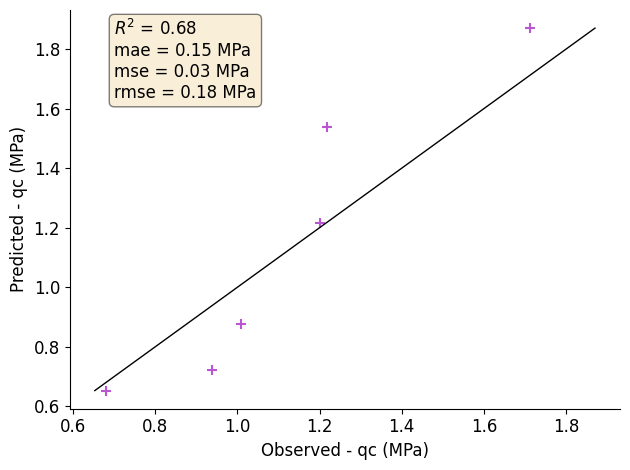

In [23]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'$R^2$ = %.2f' % (r2_qc_YL_C2), 
                     r'mae = %.2f MPa' % (mae_qc_YL_C2, ),
                     r'mse = %.2f MPa' % (mse_qc_YL_C2, ), 
                     r'rmse = %.2f MPa' % (rmse_qc_YL_C2, )))

p1 = max(max(y_pred_YL_C2[:, 0]), max(y[:, 0]))
p2 = min(min(y_pred_YL_C2[:, 0]), min(y[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y[:, 0], y_pred_YL_C2[:, 0], s = 50, c = 'mediumorchid', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(0.7, 1.9,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('YL_C2_qc', dpi = 600)

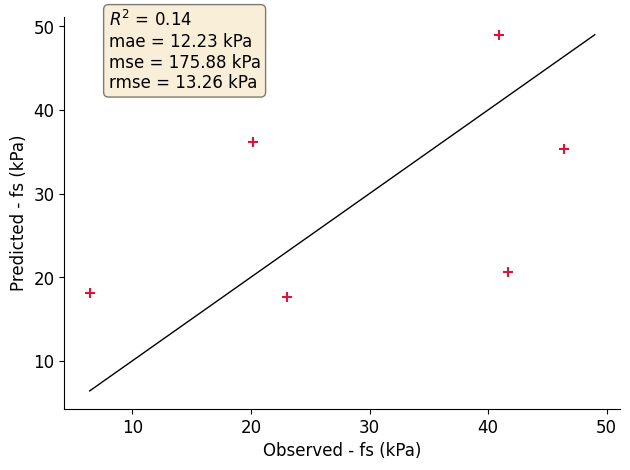

In [24]:
# 'fs (kPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'$R^2$ = %.2f' % (r2_fs_YL_C2), 
                     r'mae = %.2f kPa' % (mae_fs_YL_C2, ),
                     r'mse = %.2f kPa' % (mse_fs_YL_C2, ), 
                     r'rmse = %.2f kPa' % (rmse_fs_YL_C2, )))

p1 = max(max(y_pred_YL_C2[:, 1]), max(y[:, 1]))
p2 = min(min(y_pred_YL_C2[:, 1]), min(y[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y[:, 1], y_pred_YL_C2[:, 1], s = 50, c = 'crimson', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(8, 52, textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('YL_C2_fs_fs', dpi = 600)

________________________________________________________________________________
Predictions for NT_C16
________________________________________________________________________________

In [ ]:
#Load Sample
df_cpt = pd.read_csv(r'/content/drive/MyDrive/Thesis/Article_03_CPT/df_NT_C16.csv')

#Dropping extra coumns
df_cpt = df_cpt.drop(['Unnamed: 0', 'Unnamed: 8'], axis = 1)
df_cpt = df_cpt.drop([0, 8, 9, 10], axis = 0)

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

In [ ]:
df_cpt

In [ ]:
'''
Inputs
'''
X_NT_C16 = df_cpt[:, [0, 1, 2, 3, 4]]

#1 --> 'Depth (m)' --> index: 0
#2 --> "σ',v (kPa)" --> index: 1
#3 --> 'SBT (-)' --> index: 2
#4 --> 'SBTn (-)' --> index: 3
#5 --> 'Mod. SBTn (-)' --> index: 4

'''
Outputs
'''
y_NT_C16 = df_cpt[:, [5, 6]] 

#1 --> 'qc (MPa)' --> index: 5
#2 --> 'fs (kPa)' --> index: 6

In [ ]:
#Making a prediction
y_pred_NT_C16 = model.predict(X_NT_C16)
y_pred_NT_C16

array([[  1.94360042, 104.7989981 ],
       [  0.90694199,  36.75656344],
       [  0.96233234,  49.21831052],
       [  1.20770052,  90.00222268],
       [  0.86440858,  60.51582047],
       [  0.97774791,  86.38012804],
       [  1.04475507,  46.08390882]])

In [ ]:
y_NT_C16

In [ ]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y_NT_C16, y_pred_NT_C16)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y_NT_C16, y_pred_NT_C16)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y_pred_NT_C16, y_NT_C16)
print('The R2 is: %.4f' %r2)

print('____________________________________________')

#Metrics for the qc
print('Metrics for qc')
mae_qc_NT_C16 = mean_absolute_error(y_NT_C16[:, 0], y_pred_NT_C16[:, 0])
print('The mae is: %.4f MPa' %mae_qc_NT_C16)
mse_qc_NT_C16 = mean_squared_error(y_NT_C16[:, 0], y_pred_NT_C16[:, 0])
print('The mse is: %.4f MPa' %mse_qc_NT_C16)
rmse_qc_NT_C16 = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc_NT_C16)
r2_qc_NT_C16 = r2_score(y_NT_C16[:, 0], y_pred_NT_C16[:, 0])
print('The R2 is: %.4f MPa' %r2_qc_NT_C16)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs_NT_C16 = mean_absolute_error(y_NT_C16[:, 1], y_pred_NT_C16[:, 1])
print('The mae is: %.4f kPa' %mae_fs_NT_C16)
mse_fs_NT_C16 = mean_squared_error(y_NT_C16[:, 1], y_pred_NT_C16[:, 1])
print('The mse is: %.4f kPa' %mse_fs_NT_C16)
rmse_fs_NT_C16 = np.sqrt(mse).mean()
print('The rmse is: %.4f kPa' %rmse_fs_NT_C16)
r2_fs_NT_C16 = r2_score(y_NT_C16[:, 1], y_pred_NT_C16[:, 1])
print('The R2 is: %.4f MPa' %r2_fs_NT_C16)

Metrics Global
The mae is: 13.1739
The mse is: 458.8560
The rmse is: 21.4209
The R2 is: -1.4951
____________________________________________
Metrics for qc
The mae is: 0.5430 MPa
The mse is: 0.4114 MPa
The rmse is: 21.4209 MPa
The R2 is: -3.2106 MPa
____________________________________________
Metrics for fs
The mae is: 25.8049 kPa
The mse is: 917.3005 kPa
The rmse is: 21.4209 kPa
The R2 is: -1.6186 MPa


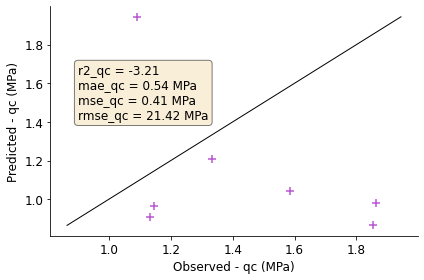

In [ ]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'r2_qc = %.2f' % (r2_qc_NT_C16), r'mae_qc = %.2f MPa' % (mae_qc_NT_C16, ),r'mse_qc = %.2f MPa' % (mse_qc_NT_C16, ), 
                     r'rmse_qc = %.2f MPa' % (rmse_qc_NT_C16, )))

p1 = max(max(y_pred_NT_C16[:, 0]), max(y_NT_C16[:, 0]))
p2 = min(min(y_pred_NT_C16[:, 0]), min(y_NT_C16[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_NT_C16[:, 0], y_pred_NT_C16[:, 0], s = 50, c = 'mediumorchid', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(0.9, 1.7,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('NT_C16_qc', dpi = 600)

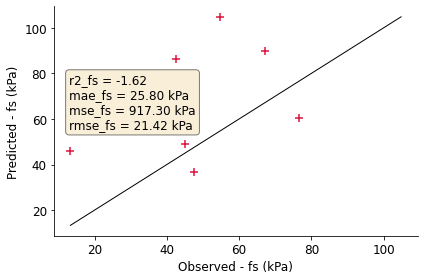

In [ ]:
# 'fs (kPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'r2_fs = %.2f' % (r2_fs_NT_C16), r'mae_fs = %.2f kPa' % (mae_fs_NT_C16, ),r'mse_fs = %.2f kPa' % (mse_fs_NT_C16, ), 
                     r'rmse_fs = %.2f kPa' % (rmse_fs_NT_C16, )))

p1 = max(max(y_pred_NT_C16[:, 1]), max(y_NT_C16[:, 1]))
p2 = min(min(y_pred_NT_C16[:, 1]), min(y_NT_C16[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_NT_C16[:, 1], y_pred_NT_C16[:, 1], s = 50, c = 'crimson', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(13, 80, textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('NT_C16_fs_fs', dpi = 600)

________________________________________________________________________________
Predictions for NT_C7
________________________________________________________________________________

In [6]:
#Load Sample
df_cpt = pd.read_csv(r'/content/drive/MyDrive/Thesis/Article_03_CPT/df_NT_C7.csv')

#Dropping extra coumns
df_cpt = df_cpt.drop(['Unnamed: 0'], axis = 1)
df_cpt = df_cpt.drop([0, 1, 2, 9, 10], axis = 0)
#df_cpt = df_cpt.dropna()

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

In [ ]:
df_cpt

array([[  8.8       , 147.        ,   6.        ,   5.45083077,
          6.98637057,  12.248     , 140.852     ],
       [ 10.2       , 160.        ,   6.        ,   5.        ,
          6.975     ,  10.105     , 118.2285    ],
       [ 11.8       , 175.        ,   5.        ,   4.95492842,
          6.05467689,   3.136     ,  51.744     ],
       [ 13.2       , 189.        ,   5.        ,   4.67952433,
          5.84635956,   2.534     ,  66.3908    ],
       [ 14.8       , 204.        ,   3.        ,   2.60132076,
          1.93544483,   2.706     ,  66.0264    ],
       [ 16.2       , 218.        ,   3.        ,   2.        ,
          1.03504633,   3.887     ,  66.079     ]])

In [7]:
'''
Inputs
'''
X_NT_C7 = df_cpt[:, [0, 1, 2, 3, 4]]

#1 --> 'Depth (m)' --> index: 0
#2 --> "σ',v (kPa)" --> index: 1
#3 --> 'SBT (-)' --> index: 2
#4 --> 'SBTn (-)' --> index: 3
#5 --> 'Mod. SBTn (-)' --> index: 4

'''
Outputs
'''
y_NT_C7 = df_cpt[:, [5, 6]] 

#1 --> 'qc (MPa)' --> index: 5
#2 --> 'fs (kPa)' --> index: 6

In [8]:
#Making a prediction
y_pred_NT_C7= model.predict(X_NT_C7) 
y_pred_NT_C7

array([[ 10.09354848, 125.80329044],
       [  8.62011182,  94.36153605],
       [  5.70080318,  53.9843476 ],
       [  5.10443489,  50.14574446],
       [  1.41475662,  80.98542673],
       [  0.70403005,  49.19161015]])

In [ ]:
y_NT_C7

array([[ 12.248 , 140.852 ],
       [ 10.105 , 118.2285],
       [  3.136 ,  51.744 ],
       [  2.534 ,  66.3908],
       [  2.706 ,  66.0264],
       [  3.887 ,  66.079 ]])

In [9]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y_NT_C7, y_pred_NT_C7)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y_NT_C7, y_pred_NT_C7)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y_pred_NT_C7, y_NT_C7)
print('The R2 is: %.4f' %r2)

print('____________________________________________')

#Metrics for the qc
print('Metrics for qc')
mae_qc_NT_C7 = mean_absolute_error(y_NT_C7[:, 0], y_pred_NT_C7[:, 0])
print('The mae is: %.4f MPa' %mae_qc_NT_C7)
mse_qc_NT_C7 = mean_squared_error(y_NT_C7[:, 0], y_pred_NT_C7[:, 0])
print('The mse is: %.4f MPa' %mse_qc_NT_C7)
rmse_qc_NT_C7 = np.sqrt(mse_qc_NT_C7).mean()
print('The rmse is: %.4f MPa' %rmse_qc_NT_C7)
r2_qc_NT_C7 = r2_score(y_NT_C7[:, 0], y_pred_NT_C7[:, 0])
print('The R2 is: %.4f MPa' %r2_qc_NT_C7)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs_NT_C7 = mean_absolute_error(y_NT_C7[:, 1], y_pred_NT_C7[:, 1])
print('The mae is: %.4f kPa' %mae_fs_NT_C7)
mse_fs_NT_C7 = mean_squared_error(y_NT_C7[:, 1], y_pred_NT_C7[:, 1])
print('The mse is: %.4f kPa' %mse_fs_NT_C7)
rmse_fs_NT_C7 = np.sqrt(mse_fs_NT_C7).mean()
print('The rmse is: %.4f kPa' %rmse_fs_NT_C7)
r2_fs_NT_C7 = r2_score(y_NT_C7[:, 1], y_pred_NT_C7[:, 1])
print('The R2 is: %.4f MPa' %r2_fs_NT_C7)

Metrics Global
The mae is: 8.5414
The mse is: 133.8170
The rmse is: 11.5679
The R2 is: 0.6070
____________________________________________
Metrics for qc
The mae is: 2.2081 MPa
The mse is: 5.3051 MPa
The rmse is: 2.3033 MPa
The R2 is: 0.6506 MPa
____________________________________________
Metrics for fs
The mae is: 14.8746 kPa
The mse is: 262.3288 kPa
The rmse is: 16.1966 kPa
The R2 is: 0.7538 MPa


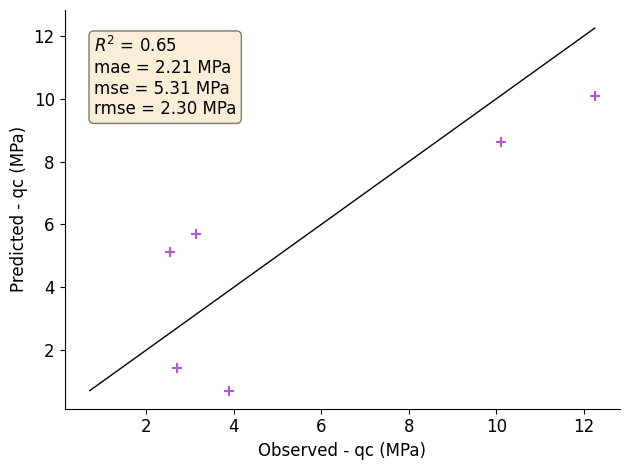

In [20]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'$R^2$ = %.2f' % (r2_qc_NT_C7) ,
                     r'mae = %.2f MPa' % (mae_qc_NT_C7), 
                     r'mse = %.2f MPa' % (mse_qc_NT_C7), 
                     r'rmse = %.2f MPa' % (rmse_qc_NT_C7),))

p1 = max(max(y_pred_NT_C7[:, 0]), max(y_NT_C7[:, 0]))
p2 = min(min(y_pred_NT_C7[:, 0]), min(y_NT_C7[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_NT_C7[:, 0], y_pred_NT_C7[:, 0], s = 50, c = 'mediumorchid', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(0.8, 12,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('NT_C7_qc', dpi = 600)

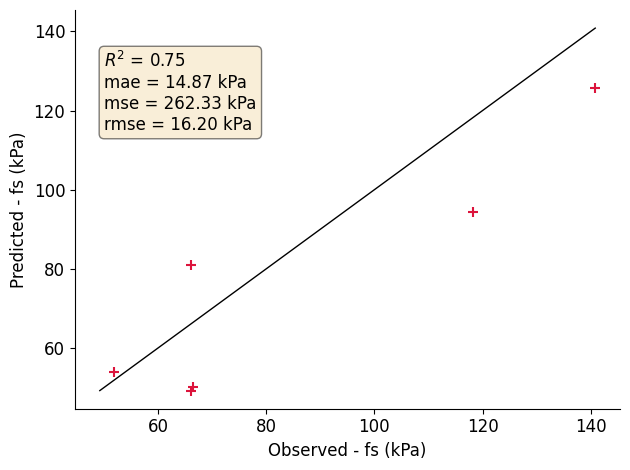

In [22]:
# 'fs (kPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'$R^2$ = %.2f' % (r2_fs_NT_C7) , 
                     r'mae = %.2f kPa' % (mae_fs_NT_C7, ),
                     r'mse = %.2f kPa' % (mse_fs_NT_C7, ), 
                     r'rmse = %.2f kPa' % (rmse_fs_NT_C7, )))

p1 = max(max(y_pred_NT_C7[:, 1]), max(y_NT_C7[:, 1]))
p2 = min(min(y_pred_NT_C7[:, 1]), min(y_NT_C7[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_NT_C7[:, 1], y_pred_NT_C7[:, 1], s = 50, c = 'crimson', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(50, 135, textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('NT_C7_fs', dpi = 600)

________________________________________________________________________________
Predictions for NT_C15
________________________________________________________________________________

In [ ]:
#Load Sample
df_cpt = pd.read_csv(r'/content/drive/MyDrive/Thesis/Article_03_CPT/df_NT_C15.csv')

#Dropping extra coumns
df_cpt = df_cpt.drop(['Unnamed: 0', 'Unnamed: 8', 'Unnamed: 9'], axis = 1)
df_cpt = df_cpt.drop([0, 1, 2, 3, 4, 9, 10], axis = 0)

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

In [ ]:
df_cpt

array([[ 11.8       , 128.        ,   4.        ,   3.36656323,
          3.0673351 ,   2.777     ,  55.54      ],
       [ 13.2       , 142.        ,   4.        ,   3.35210833,
          2.11803293,   2.563     ,  45.8777    ],
       [ 14.8       , 159.        ,   4.        ,   3.13054462,
          1.96111527,   2.443     ,  29.0717    ],
       [ 16.2       , 172.        ,   5.        ,   4.4043285 ,
          5.04936717,   7.462     , 116.4072    ]])

In [ ]:
'''
Inputs
'''
X_NT_C15 = df_cpt[:, [0, 1, 2, 3, 4]]

#1 --> 'Depth (m)' --> index: 0
#2 --> "σ',v (kPa)" --> index: 1
#3 --> 'SBT (-)' --> index: 2
#4 --> 'SBTn (-)' --> index: 3
#5 --> 'Mod. SBTn (-)' --> index: 4

'''
Outputs
'''
y_NT_C15 = df_cpt[:, [5, 6]] 

#1 --> 'qc (MPa)' --> index: 5
#2 --> 'fs (kPa)' --> index: 6

In [ ]:
#Making a prediction
y_pred_NT_C15 = model.predict(X_NT_C15)  
y_pred_NT_C15

array([[  2.6459439 , 100.37753795],
       [  1.15677245,  24.5306875 ],
       [  1.11824669,  22.72590272],
       [  4.27707731,  94.3973118 ]])

In [ ]:
y_NT_C15

array([[  2.777 ,  55.54  ],
       [  2.563 ,  45.8777],
       [  2.443 ,  29.0717],
       [  7.462 , 116.4072]])

In [ ]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y_NT_C15, y_pred_NT_C15)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y_NT_C15, y_pred_NT_C15)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y_pred_NT_C15, y_NT_C15)
print('The R2 is: %.4f' %r2)

print('____________________________________________')

#Metrics for the qc
print('Metrics for qc')
mae_qc_NT_C15 = mean_absolute_error(y_NT_C15[:, 0], y_pred_NT_C15[:, 0])
print('The mae is: %.4f MPa' %mae_qc_NT_C15)
mse_qc_NT_C15 = mean_squared_error(y_NT_C15[:, 0], y_pred_NT_C15[:, 0])
print('The mse is: %.4f MPa' %mse_qc_NT_C15)
rmse_qc_NT_C15 = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc_NT_C15)
r2_qc_NT_C15 = r2_score(y_NT_C15[:, 0], y_pred_NT_C15[:, 0])
print('The R2 is: %.4f MPa' %r2_qc_NT_C15)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs_NT_C15 = mean_absolute_error(y_NT_C15[:, 1], y_pred_NT_C15[:, 1])
print('The mae is: %.4f kPa' %mae_fs_NT_C15)
mse_fs_NT_C15 = mean_squared_error(y_NT_C15[:, 1], y_pred_NT_C15[:, 1])
print('The mse is: %.4f kPa' %mse_fs_NT_C15)
rmse_fs_NT_C15 = np.sqrt(mse).mean()
print('The rmse is: %.4f kPa' %rmse_fs_NT_C15)
r2_fs_NT_C15 = r2_score(y_NT_C15[:, 1], y_pred_NT_C15[:, 1])
print('The R2 is: %.4f MPa' %r2_fs_NT_C15)

Metrics Global
The mae is: 12.5734
The mse is: 375.5872
The rmse is: 19.3801
The R2 is: -0.3058
____________________________________________
Metrics for qc
The mae is: 1.5117 MPa
The mse is: 3.4733 MPa
The rmse is: 19.3801 MPa
The R2 is: 0.2207 MPa
____________________________________________
Metrics for fs
The mae is: 23.6351 kPa
The mse is: 747.7010 kPa
The rmse is: 19.3801 kPa
The R2 is: 0.3118 MPa


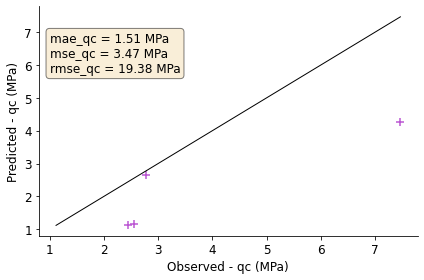

In [ ]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'mae_qc = %.2f MPa' % (mae_qc_NT_C15, ),r'mse_qc = %.2f MPa' % (mse_qc_NT_C15, ), r'rmse_qc = %.2f MPa' % (rmse_qc_NT_C15, )))

p1 = max(max(y_pred_NT_C15[:, 0]), max(y_NT_C15[:, 0]))
p2 = min(min(y_pred_NT_C15[:, 0]), min(y_NT_C15[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_NT_C15[:, 0], y_pred_NT_C15[:, 0], s = 50, c = 'mediumorchid', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(1, 7,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('NT_C15_qc', dpi = 600)

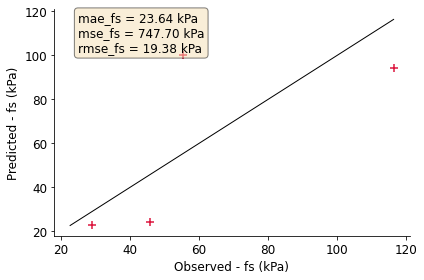

In [ ]:
# 'fs (kPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'mae_fs = %.2f kPa' % (mae_fs_NT_C15, ),r'mse_fs = %.2f kPa' % (mse_fs_NT_C15, ), r'rmse_fs = %.2f kPa' % (rmse_fs_NT_C15, )))

p1 = max(max(y_pred_NT_C15[:, 1]), max(y_NT_C15[:, 1]))
p2 = min(min(y_pred_NT_C15[:, 1]), min(y_NT_C15[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_NT_C15[:, 1], y_pred_NT_C15[:, 1], s = 50, c = 'crimson', marker = '+')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(25, 120, textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox=props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
fig.savefig('NT_C15_fs_fs', dpi = 600)